## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: ENGG69 - Deep Learning

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---


## Basic Concepts - Part I:

Perform the time-frequency analyses described below:

1. With 80 meters of fencing, a farmer wishes to enclose a rectangular area next to a river to confine some animals. The side of the rectangular area along the riverbank is not fenced. What should be the dimensions, in meters, of the area to maximize the enclosed area? Sketch the cost function graph defined for the problem.

2. A cylindrical container, open at the top, must have a capacity of 375π cm3. The cost of the material used for the base of the container is RS 0.15 per cm2, the cost of the material used for the sides is RS 0.05 per cm2. If there is no material loss, determine the dimensions that minimize the cost of the material to construct it.

3. Define the learning rule of the gradient algorithm for the two problems above.

4. Implement the gradient algorithm computationally for the two problems above and study the convergence behavior based on the value of the parameter α and the initial solution x0 (choose a range of variation and a step for these two parameters and execute the algorithm for each of the possible combinations of α and x0).


---

## Importing the Libraries

In [4]:
# Library imports and general structures
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi
import sympy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns

## Maximum area calculation by the direct method and using Gradient
### Gradient:
*   Area(n+1) = Area(n) + (- b + 40)
*   Where b is the length of the sides parallel to the lake



            Parameter  Direct Method  Gradient Method
0        Maximum Area          800.0        800.00000
1              SIDE B           40.0         39.99878
2              SIDE A           20.0         20.00061
3     Total Perimeter          120.0        119.99878
4  Enclosed Perimeter           80.0         80.00000


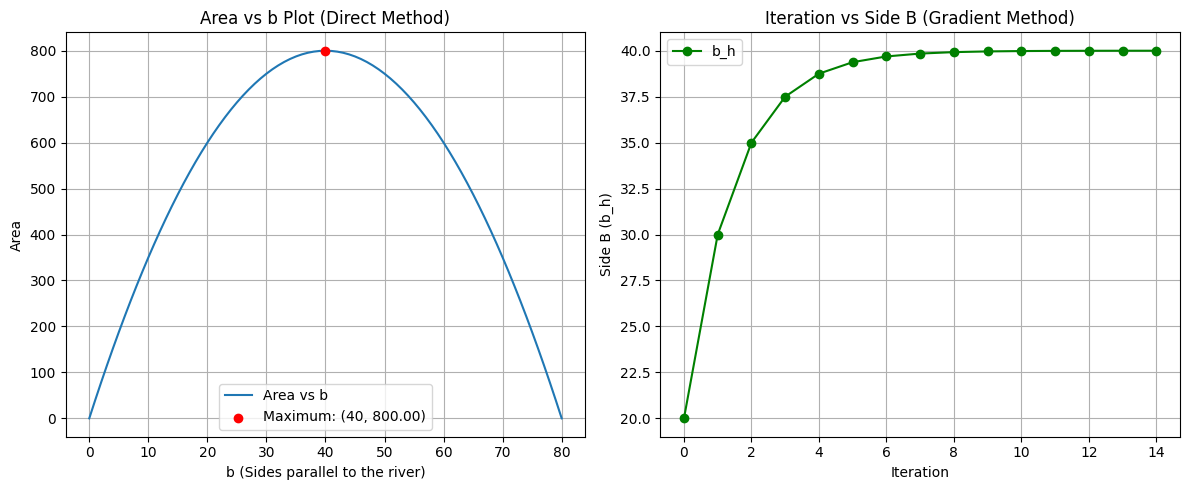

In [6]:
# Defining area
def area(b):
    a = (80 - b) / 2
    return a * b

# Calculating the area for different values of b
b_values = np.arange(0, 81)
area_values = area(b_values)

# Finding the maximum area and the corresponding values of 'a' and 'b'
max_area = max(area_values)
max_index = np.argmax(area_values)
b_max = b_values[max_index]
a_max = (80 - b_max) / 2
total_perimeter = 2 * a_max + 2 * b_max
enclosed_perimeter = 2 * a_max + b_max

# Plot of b versus area (Direct Method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(b_values, area_values, label='Area vs b')
plt.scatter(b_max, max_area, color='red', zorder=5, label=f'Maximum: ({b_max}, {max_area:.2f})')
plt.xlabel('b (Sides parallel to the river)')
plt.ylabel('Area')
plt.title('Area vs b Plot (Direct Method)')
plt.legend()
plt.grid(True)

# Derivative of the area function with respect to b
def derivative_area(b):
    return (-b + 40)  # Derivative of a*b with a = (80 - b)/2

# Gradient Method
b_h = []
area_h = []
def gradient_method(initial_b, learning_rate=0.5, iterations=15):
    current_b = initial_b
    for i in range(iterations):
        gradient = derivative_area(current_b)
        current_b += learning_rate * gradient  # Update b using the gradient

        b_h.append(current_b)
        area_h.append(area(current_b))

    return current_b

# Initial value of b
initial_b = 0.0
optimized_b = gradient_method(initial_b)

# Calculating the maximum area and the corresponding value of a
optimized_a = (80 - optimized_b) / 2
max_area_gradient = area(optimized_b)

# Calculating the perimeters
total_perimeter_gradient = 2 * optimized_a + 2 * optimized_b
enclosed_perimeter_gradient = 2 * optimized_a + optimized_b

# Plot 2: Iterations vs Varying Side (Gradient Method)
plt.subplot(1, 2, 2)
plt.plot(range(len(b_h)), b_h, '-o', color='green', label='b_h')
plt.xlabel('Iteration')
plt.ylabel('Side B (b_h)')
plt.title('Iteration vs Side B (Gradient Method)')
plt.grid(True)
plt.legend()

# Creating the comparison table
data = {
    'Parameter': ['Maximum Area', 'SIDE B', 'SIDE A', 'Total Perimeter', 'Enclosed Perimeter'],
    'Direct Method': [
        round(max_area, 5), round(b_max, 5), round(a_max, 5),
        round(total_perimeter, 2), round(enclosed_perimeter, 5)
    ],
    'Gradient Method': [
        round(max_area_gradient, 5), round(optimized_b, 5), round(optimized_a, 5),
        round(total_perimeter_gradient, 5), round(enclosed_perimeter_gradient, 5)
    ]
}
table = pd.DataFrame(data)
print(table)
# Adjust layout and display the plots
plt.tight_layout()
plt.show()


For the direct calculation, we had an idea of the limit of the value of b based on the equation, which gave us a limit on the number of iterations, and by observing the quadratic behavior, we had a preliminary idea of what the maximum value would be. However, this might not hold true for other cases.

Using the gradient method, we know that the derivative with an initial value of 0 and alpha of 1 would already converge to the desired value. However, using more common values, such as alpha 0.5, we obtained extremely accurate results with less than 15 iterations.

---

## Calculation of Minimum Cost by the Direct Method and Using Gradient
### Gradient:
*   Cost(n+1) = Cost(n) - (- 0.15 * 2 * pi * r - 0.05 * 375 * 2 * pi * (r**(-2)))
*   Where r is the radius of the base of the cylinder.

            Parameter  Direct Method  Gradient Method
0   Minimum Cost (R$)       35.34292         35.34292
1         Radius (cm)        5.00000          5.00004
2         Height (cm)       15.00000         14.99977
3     Base Area (cm²)       78.53982         78.54101
4  Lateral Area (cm²)      471.23890        471.23532


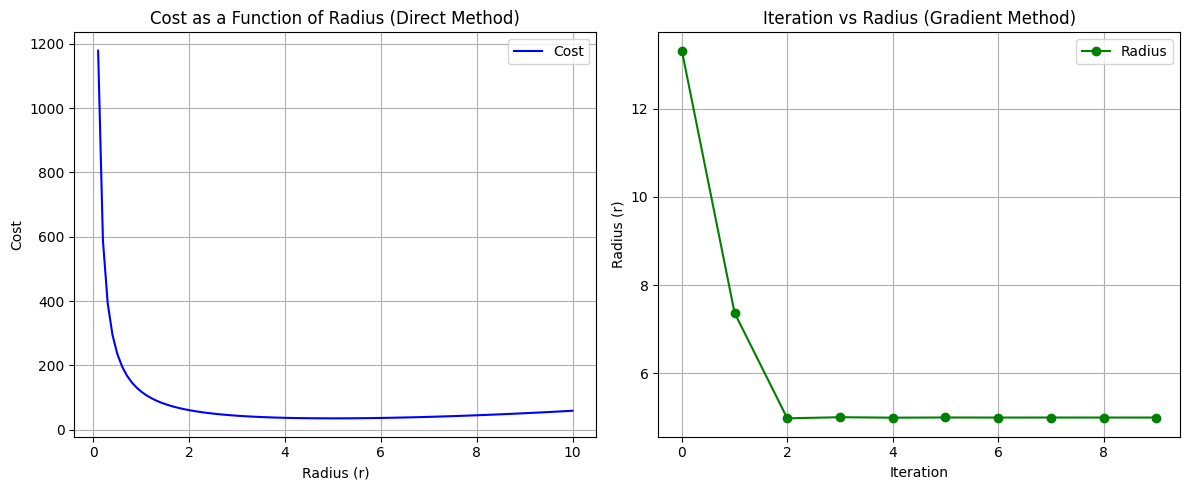

In [9]:
# Cost function
def cost(r):
    h = (375 * pi) / (pi * r**2)
    return 0.15 * pi * (r**2) + 0.05 * 2 * pi * r * h

# Derivative of the cost function
def derivative_cost(r):
    return 0.15 * 2 * pi * r - 0.05 * 375 * 2 * pi * (r**(-2))

# Gradient Method
def gradient_method(initial_r, learning_rate=0.5, iterations=10):
    current_r = initial_r
    r_history = []
    cost_history = []
    for i in range(iterations):
        gradient = derivative_cost(current_r)
        current_r -= learning_rate * gradient  # Update r (since it's a minimum, we need to decrease the value)
        r_history.append(current_r)
        cost_history.append(cost(current_r))
    return current_r, r_history, cost_history

# Calculation by the Direct Method
r_values = np.linspace(0.1, 10, 100)
cost_values = cost(r_values)
min_cost = min(cost_values)
min_index = np.argmin(cost_values)
r_min = r_values[min_index]
h_min = (375 * pi) / (pi * r_min**2)

# Calculation by the Gradient Method
initial_r = 25
optimized_r, r_history, cost_history = gradient_method(initial_r)
optimized_h = (375 * pi) / (pi * optimized_r**2)
optimized_cost = cost(optimized_r)

# Creating the comparison table
data = {
    'Parameter': ['Minimum Cost (R$)', 'Radius (cm)', 'Height (cm)', 'Base Area (cm²)', 'Lateral Area (cm²)'],
    'Direct Method': [
        round(min_cost, 5), round(r_min, 5), round(h_min, 5),
        round(pi * (r_min**2), 5), round(2 * pi * r_min * h_min, 5)
    ],
    'Gradient Method': [
        round(optimized_cost, 5), round(optimized_r, 5), round(optimized_h, 5),
        round(pi * (optimized_r**2), 5), round(2 * pi * optimized_r * optimized_h, 5)
    ]
}
table = pd.DataFrame(data)
print(table)

# Generating side-by-side graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graph 1: Cost as a function of Radius (Direct Method)
ax1.plot(r_values, cost_values, label='Cost', color='blue')
ax1.set_title('Cost as a Function of Radius (Direct Method)')
ax1.set_xlabel('Radius (r)')
ax1.set_ylabel('Cost')
ax1.grid()
ax1.legend()

# Graph 2: Iterations vs Radius (Gradient Method)
ax2.plot(range(len(r_history)), r_history, '-o', color='green', label='Radius')
ax2.set_title('Iteration vs Radius (Gradient Method)')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Radius (r)')
ax2.grid()
ax2.legend()

# Adjust the layout and display the graphs
plt.tight_layout()
plt.show()


Using the direct method, it is necessary to test some boundary values since the function is not as easily visualized as the previous one. We identified that the radius would be relatively small, and to ensure that we had an extremely accurate point, we created a linspace with a large number of points. This guaranteed that the minimum cost would be for a value very close to a radius of 5 cm.

When using the gradient method, and knowing that the trend is to decrease the value, we need to choose an initial value greater than zero, much greater than zero. Through trial and error, we found that we would have a good visualization of the trend if we reduced the radius to less than 30 cm. We chose a conservative alpha of 0.5, the same as in the other case, and noticed that the convergence was even faster, with fewer than 5 iterations.

However, unlike the other case, if we increased alpha too much, we could have a response that did not converge as quickly.

---